# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [2]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [3]:
employees = pd.read_excel(file_path, sheet_name="employees")
performance = pd.read_excel(file_path, sheet_name="performance_yearly")
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")
profiles = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")
strength = pd.read_excel(file_path, sheet_name="strengths")

In [6]:
competencies.dtypes

employee_id     object
score          float64
pillar_code     object
year             int64
dtype: object

In [4]:
display(employees.head())
display(performance.head())
display(competencies.head())
display(profiles.head())
display(papi.head())
display(strength.head())

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [5]:
pillars = pd.read_excel(file_path, sheet_name="dim_competency_pillars")

dim_grades = pd.read_excel(file_path, sheet_name="dim_grades")
dim_directorates = pd.read_excel(file_path, sheet_name="dim_directorates")
dim_divisions = pd.read_excel(file_path, sheet_name="dim_divisions")
dim_departments = pd.read_excel(file_path, sheet_name="dim_departments")
dim_positions = pd.read_excel(file_path, sheet_name="dim_positions")
dim_education = pd.read_excel(file_path, sheet_name="dim_education")
dim_majors = pd.read_excel(file_path, sheet_name="dim_majors")
dim_areas = pd.read_excel(file_path, sheet_name="dim_areas")
dim_companies = pd.read_excel(file_path, sheet_name="dim_companies")


In [52]:
# Buat dictionary mapping dari setiap tabel dimensi
map_company = dict(zip(dim_companies["company_id"], dim_companies["name"]))
map_area = dict(zip(dim_areas["area_id"], dim_areas["name"]))
map_position = dict(zip(dim_positions["position_id"], dim_positions["name"]))
map_department = dict(zip(dim_departments["department_id"], dim_departments["name"]))
map_division = dict(zip(dim_divisions["division_id"], dim_divisions["name"]))
map_directorate = dict(zip(dim_directorates["directorate_id"], dim_directorates["name"]))
map_grade = dict(zip(dim_grades["grade_id"], dim_grades["name"]))
map_education = dict(zip(dim_education["education_id"], dim_education["name"]))
map_major = dict(zip(dim_majors["major_id"], dim_majors["name"]))

# Duplikasi data asli agar tidak mengubah 'employees'
employees_name = employees.copy()

# Mapping ID → Nama
employees_name["company_id"] = employees_name["company_id"].map(map_company)
employees_name["area_id"] = employees_name["area_id"].map(map_area)
employees_name["position_id"] = employees_name["position_id"].map(map_position)
employees_name["department_id"] = employees_name["department_id"].map(map_department)
employees_name["division_id"] = employees_name["division_id"].map(map_division)
employees_name["directorate_id"] = employees_name["directorate_id"].map(map_directorate)
employees_name["grade_id"] = employees_name["grade_id"].map(map_grade)
employees_name["education_id"] = employees_name["education_id"].map(map_education)
employees_name["major_id"] = employees_name["major_id"].map(map_major)

# Ubah nama kolom menjadi lebih deskriptif
employees_name = employees_name.rename(columns={
    "company_id": "company_name",
    "area_id": "area_name",
    "position_id": "position_name",
    "department_id": "department_name",
    "division_id": "division_name",
    "directorate_id": "directorate_name",
    "grade_id": "grade_name",
    "education_id": "education_name",
    "major_id": "major_name"
})

display(employees_name.head())


,employee_id,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


# EDA

# Outlier Score

### Performance

In [53]:
performance

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021
...,...,...,...
10045,DUP1942,5.0,2025
10046,DUP2096,3.0,2025
10047,DUP4177,2.0,2025
10048,DUP9801,5.0,2025


In [54]:
rating_performance = pd.DataFrame({
    'Jumlah': performance['rating'].value_counts().sort_index(),
    'Persentase (%)': (performance['rating'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_performance)

,Jumlah,Persentase (%)
rating,,
0.0,15,0.17
1.0,672,7.52
2.0,1578,17.65
3.0,3339,37.34
4.0,2437,27.25
5.0,881,9.85
6.0,13,0.15
99.0,7,0.08


C:\Users\fajar\AppData\Local\Temp\ipykernel_18300\1816126311.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')


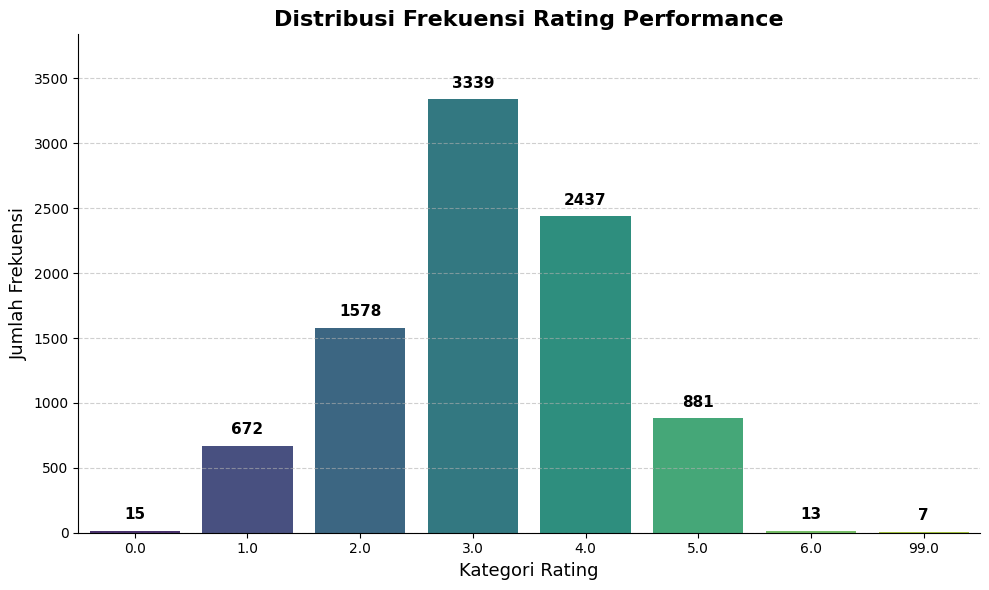

In [55]:
# Hitung frekuensi nilai rating
rating_counts = performance['rating'].value_counts().sort_index()
df_counts = rating_counts.reset_index()
df_counts.columns = ['Rating', 'Jumlah']

# Plot distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi Rating Performance', fontsize=16, weight='bold')
plt.xlabel('Kategori Rating', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [56]:
# --- Duplikasi dataframe agar data asli tetap aman ---
performance_clean = performance.copy()

# Ganti nilai di luar 1–5 menjadi NaN
performance_clean.loc[
    (performance_clean['rating'] < 1) | (performance_clean['rating'] > 5),
    'rating'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi rating setelah pembersihan:\n")
print(performance_clean['rating'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = performance_clean['rating'].isna().sum()
print(f"\nJumlah nilai rating yang diubah menjadi NaN: {num_nan}")



Distribusi rating setelah pembersihan:

rating
1.0     672
2.0    1578
3.0    3339
4.0    2437
5.0     881
NaN    1143
Name: count, dtype: int64

Jumlah nilai rating yang diubah menjadi NaN: 1143


### Competencies

In [57]:
competencies

,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021
...,...,...,...,...
100495,DUP1942,5.0,CSI,2025
100496,DUP2096,3.0,CSI,2025
100497,DUP4177,2.0,CSI,2025
100498,DUP9801,5.0,CSI,2025


In [58]:
rating_competencies = pd.DataFrame({
    'Jumlah': competencies['score'].value_counts().sort_index(),
    'Persentase (%)': (competencies['score'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_competencies)

,Jumlah,Persentase (%)
score,,
0.0,163,0.18
1.0,8688,9.68
2.0,17857,19.91
3.0,28206,31.44
4.0,22936,25.57
5.0,11523,12.84
6.0,165,0.18
99.0,171,0.19


C:\Users\fajar\AppData\Local\Temp\ipykernel_18300\4186793133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')


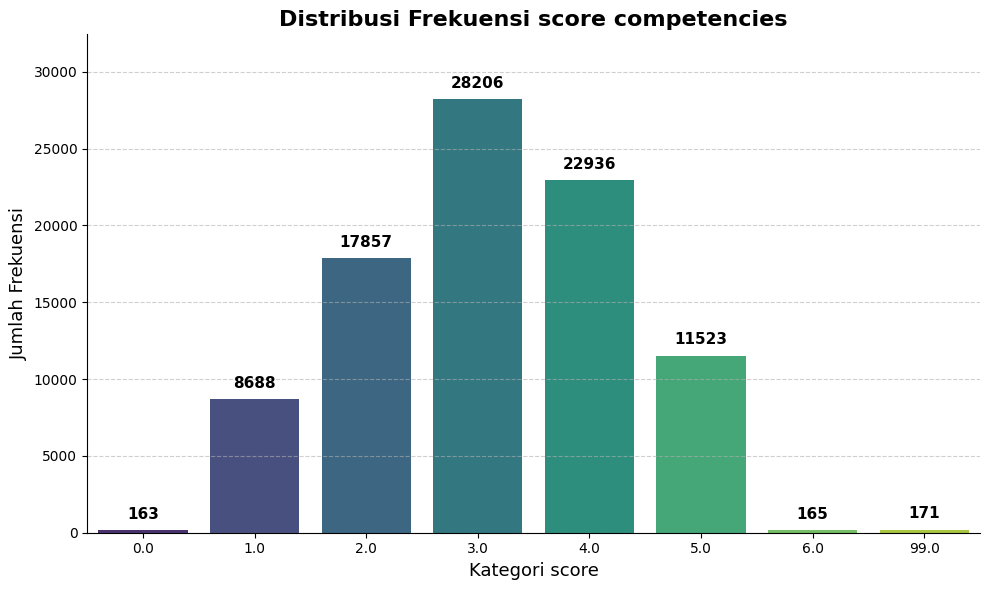

In [59]:
# Hitung frekuensi nilai score
score_counts = competencies['score'].value_counts().sort_index()
df_counts = score_counts.reset_index()
df_counts.columns = ['score', 'Jumlah']

# Plot distribusi score
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi score competencies', fontsize=16, weight='bold')
plt.xlabel('Kategori score', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [60]:
# --- Duplikasi dataframe agar data asli tetap aman ---
competencies_clean = competencies.copy()

# Ganti nilai di luar 1–5 menjadi NaN
competencies_clean.loc[
    (competencies_clean['score'] < 1) | (competencies_clean['score'] > 5),
    'score'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi score setelah pembersihan:\n")
print(competencies_clean['score'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = competencies_clean['score'].isna().sum()
print(f"\nJumlah nilai score yang diubah menjadi NaN: {num_nan}")



Distribusi score setelah pembersihan:

score
1.0     8688
2.0    17857
3.0    28206
4.0    22936
5.0    11523
NaN    11290
Name: count, dtype: int64

Jumlah nilai score yang diubah menjadi NaN: 11290


## Contextual factors

In [61]:
performance_employees_name = (
    performance_clean
    .merge(employees_name, on="employee_id", how="left")
)
display(performance_employees_name.head())

,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,NaN,2021,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


In [62]:
performance_employees = (
    performance_clean
    .merge(employees, on="employee_id", how="left")
)
display(performance_employees.head())

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [63]:
# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees_name['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees_name['years_of_service_adjusted'] = (
    performance_employees_name['years_of_service_months']
    - (LATEST_YEAR - performance_employees_name['year']) * 12
)

# Hapus baris dengan masa kerja negatif
performance_employees_name = performance_employees_name[
    performance_employees_name['years_of_service_adjusted'] >= 0
].copy()

# Hapus kolom 'years_of_service_months' karena sudah tidak dibutuhkan
performance_employees_name.drop(columns=['years_of_service_months'], inplace=True)

# Tampilkan hasil akhir
display(performance_employees_name.head())


,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,10
5,EMP100005,NaN,2021,Bayu Zulfikar,590302,PT Aurora Beauty Indonesia,Distribution,Sales Supervisor,HR,Product Dev,Commercial,III,S2,Business,18
6,EMP100006,4.0,2021,Indra Santoso,826406,PT Aurora Beauty Indonesia,Plant,Finance Officer,HR,Digital Marketing,HR & Corp Affairs,III,D3,Engineering,34
7,EMP100007,4.0,2021,Rani Mahendra,878510,PT Mandala Distribution Center,Plant,HRBP,IT,Operations,HR & Corp Affairs,V,S1,Business,8


In [64]:
# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees['years_of_service_adjusted'] = (
    performance_employees['years_of_service_months']
    - (LATEST_YEAR - performance_employees['year']) * 12
)

# Hapus baris dengan masa kerja negatif
performance_employees = performance_employees[
    performance_employees['years_of_service_adjusted'] >= 0
].copy()

# Hapus kolom 'years_of_service_months' karena sudah tidak dibutuhkan
performance_employees.drop(columns=['years_of_service_months'], inplace=True)

# Tampilkan hasil akhir
display(performance_employees.head())


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,10
5,EMP100005,NaN,2021,Bayu Zulfikar,590302,1,1,5,2,3,1,1,3,1,18
6,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,34
7,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,8


In [65]:
# ============================================================
# SIMPAN HASIL KE FILE EXCEL
# ============================================================

# Tentukan nama file output
output_path = "performance_employees_adjusted.xlsx"

# Simpan ke file Excel
performance_employees.to_excel(output_path, index=False)

print(f"✅ Data berhasil disimpan ke file: {output_path}")


✅ Data berhasil disimpan ke file: performance_employees_adjusted.xlsx


In [66]:
performance_employees.shape

(8084, 15)

In [67]:
corr_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id',
    'years_of_service_adjusted',
    'rating'
]

corr_vars_name = [
    'company_name',
    'area_name',
    'position_name',
    'department_name',
    'division_name',
    'directorate_name',
    'grade_name',
    'education_name',
    'major_name',
    'years_of_service_adjusted',
    'rating'
]

In [68]:
import numpy as np
import pandas as pd
from scipy import stats

df_name = performance_employees_name.copy()
df_name['rating'] = pd.to_numeric(df_name['rating'], errors='coerce')
print("Missing per var:\n", df_name[corr_vars_name].isna().mean())


Missing per var:
 company_name                 0.000000
area_name                    0.000000
position_name                0.000000
department_name              0.000000
division_name                0.000000
directorate_name             0.000000
grade_name                   0.000000
education_name               0.000000
major_name                   0.000000
years_of_service_adjusted    0.000000
rating                       0.087086
dtype: float64


In [69]:
import numpy as np
import pandas as pd
from scipy import stats

df = performance_employees.copy()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print("Missing per var:\n", df[corr_vars].isna().mean())


Missing per var:
 company_id                   0.000000
area_id                      0.000000
position_id                  0.000000
department_id                0.000000
division_id                  0.000000
directorate_id               0.000000
grade_id                     0.000000
education_id                 0.000000
major_id                     0.000000
years_of_service_adjusted    0.000000
rating                       0.087086
dtype: float64


In [70]:
# drop kolom yang tidak relevan (numerik dan target)
corr_vars_cat = [c for c in corr_vars_name if c not in [
    'years_of_service_adjusted',
    'rating'
]]

# tambahkan kolom target biner
df_name['is_high'] = (df_name['rating'] == 5).astype(int)

for cat in corr_vars_cat:
    out = (df_name.groupby(cat)['is_high']
             .agg(['sum','count'])
             .assign(prop=lambda x: (x['sum'] / x['count']).round(4))
             .sort_values('prop', ascending=False))
    print(f"\nTop groups by prop high performer in {cat}:")
    display(out.head(10))



Top groups by prop high performer in company_name:


,sum,count,prop
company_name,,,
PT Mandala Distribution Center,213,1990,0.1070
PT VASKA Wellness,199,2150,0.0926
PT Aurora Beauty Indonesia,168,1956,0.0859
PT Lumo Cosmetics Asia,156,1988,0.0785



Top groups by prop high performer in area_name:


,sum,count,prop
area_name,,,
Plant,183,1939,0.0944
HQ,183,1961,0.0933
Store,184,1978,0.0930
Distribution,186,2206,0.0843



Top groups by prop high performer in position_name:


,sum,count,prop
position_name,,,
HRBP,141,1421,0.0992
Finance Officer,133,1378,0.0965
Sales Supervisor,121,1323,0.0915
Data Analyst,120,1360,0.0882
Brand Executive,114,1335,0.0854
Supply Planner,107,1267,0.0845



Top groups by prop high performer in department_name:


,sum,count,prop
department_name,,,
IT,147,1475,0.0997
Marketing,129,1368,0.0943
Operations,132,1423,0.0928
Finance,116,1264,0.0918
HR,110,1297,0.0848
R&D,102,1257,0.0811



Top groups by prop high performer in division_name:


,sum,count,prop
division_name,,,
Operations,156,1588,0.0982
Product Dev,166,1702,0.0975
Digital Marketing,137,1540,0.0890
Sales,140,1631,0.0858
Talent Management,137,1623,0.0844



Top groups by prop high performer in directorate_name:


,sum,count,prop
directorate_name,,,
Technology,281,2793,0.1006
HR & Corp Affairs,241,2749,0.0877
Commercial,214,2542,0.0842



Top groups by prop high performer in grade_name:


,sum,count,prop
grade_name,,,
III,254,2699,0.0941
IV,250,2664,0.0938
V,232,2721,0.0853



Top groups by prop high performer in education_name:


,sum,count,prop
education_name,,,
S2,231,2141,0.1079
S1,193,2004,0.0963
SMA,158,1875,0.0843
D3,154,2064,0.0746



Top groups by prop high performer in major_name:


,sum,count,prop
major_name,,,
Engineering,137,1307,0.1048
Economics,145,1471,0.0986
Statistics,116,1335,0.0869
Design,114,1317,0.0866
Business,110,1295,0.0849
Psychology,114,1359,0.0839


In [71]:
df_name.head()

,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_adjusted,is_high
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,16,0
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,10,0
5,EMP100005,NaN,2021,Bayu Zulfikar,590302,PT Aurora Beauty Indonesia,Distribution,Sales Supervisor,HR,Product Dev,Commercial,III,S2,Business,18,0
6,EMP100006,4.0,2021,Indra Santoso,826406,PT Aurora Beauty Indonesia,Plant,Finance Officer,HR,Digital Marketing,HR & Corp Affairs,III,D3,Engineering,34,0
7,EMP100007,4.0,2021,Rani Mahendra,878510,PT Mandala Distribution Center,Plant,HRBP,IT,Operations,HR & Corp Affairs,V,S1,Business,8,0


In [72]:
df_name.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7380.0,3.145257,1.065944,1.0,2.0,3.0,4.0,5.0
year,8084.0,2023.293790,1.358404,2021.0,2022.0,2023.0,2024.0,2025.0
nip,8084.0,550214.800346,259168.400709,100945.0,325705.0,540300.0,777333.0,999361.0
years_of_service_adjusted,8084.0,36.349827,24.086335,0.0,17.0,33.0,52.0,149.0
is_high,8084.0,0.091044,0.287690,0.0,0.0,0.0,0.0,1.0


In [73]:
df_high = df_name[df_name['is_high'] == 1]
statistik_is_high_1 = df_high.describe().T

print("Descriptive Statistics for Employees with Ratings 5:")
display(statistik_is_high_1)

df_high = df_name[df_name['is_high'] == 0]
statistik_is_high_0 = df_high.describe().T

print("Descriptive Statistics for Employees with Ratings <5:")
display(statistik_is_high_0)

Descriptive Statistics for Employees with Ratings 5:


,count,mean,std,min,25%,50%,75%,max
rating,736.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
year,736.0,2023.301630,1.309847,2021.0,2022.00,2023.0,2024.0,2025.0
nip,736.0,560793.910326,262989.496941,100965.0,341581.75,551900.0,816566.0,998572.0
years_of_service_adjusted,736.0,36.472826,23.900857,0.0,17.00,34.0,53.0,125.0
is_high,736.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0


Descriptive Statistics for Employees with Ratings <5:


,count,mean,std,min,25%,50%,75%,max
rating,6644.0,2.939795,0.915841,1.0,2.0,3.0,4.0,4.0
year,7348.0,2023.293005,1.363256,2021.0,2022.0,2023.0,2025.0,2025.0
nip,7348.0,549155.161677,258776.862608,100945.0,325441.0,539215.5,775302.0,999361.0
years_of_service_adjusted,7348.0,36.337507,24.106415,0.0,17.0,33.0,52.0,149.0
is_high,7348.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


C:\Users\fajar\AppData\Local\Temp\ipykernel_18300\683190704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


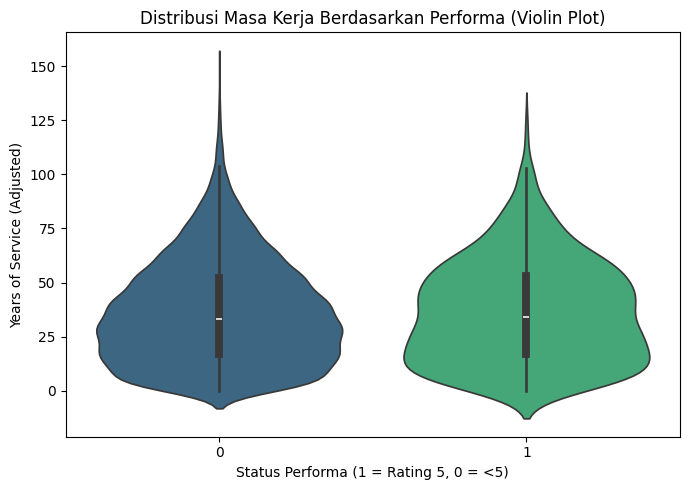

In [74]:
plt.figure(figsize=(7, 5))
sns.violinplot(
    data=df_name,
    x='is_high',
    y='years_of_service_adjusted',
    inner='box',
    palette='viridis'
)
plt.title("Distribusi Masa Kerja Berdasarkan Performa (Violin Plot)")
plt.xlabel("Status Performa (1 = Rating 5, 0 = <5)")
plt.ylabel("Years of Service (Adjusted)")
plt.tight_layout()
plt.show()


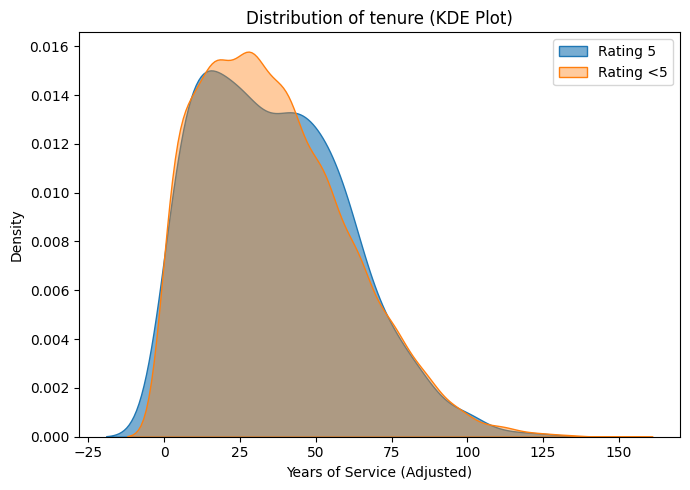

In [75]:
plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=df_name[df_name['is_high'] == 1],
    x='years_of_service_adjusted',
    label='Rating 5',
    fill=True,
    alpha=0.6
)
sns.kdeplot(
    data=df_name[df_name['is_high'] == 0],
    x='years_of_service_adjusted',
    label='Rating <5',
    fill=True,
    alpha=0.4
)
plt.title("Distribution of tenure (KDE Plot)")
plt.xlabel("Years of Service (Adjusted)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
# tambahkan kolom target biner
df['is_high'] = (df['rating'] == 5).astype(int)


In [77]:
import scipy.stats as stats
import numpy as np

cramers_results = []
for cat in corr_vars_cat:
    table = pd.crosstab(df_name[cat], df_name['is_high'])
    chi2, p, dof, exp = stats.chi2_contingency(table)
    n = table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
    print(f"{cat}: Cramér’s V = {cramers_v:.3f}, p = {p:.4f}")
    cramers_results.append({'Variable': cat, 'CramersV': cramers_v, 'p_value': p})



company_name: Cramér’s V = 0.036, p = 0.0139
area_name: Cramér’s V = 0.014, p = 0.6406
position_name: Cramér’s V = 0.019, p = 0.7060
department_name: Cramér’s V = 0.021, p = 0.6002
division_name: Cramér’s V = 0.020, p = 0.5032
directorate_name: Cramér’s V = 0.025, p = 0.0858
grade_name: Cramér’s V = 0.014, p = 0.4366
education_name: Cramér’s V = 0.044, p = 0.0013
major_name: Cramér’s V = 0.027, p = 0.3036


C:\Users\fajar\AppData\Local\Temp\ipykernel_18300\2067235499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


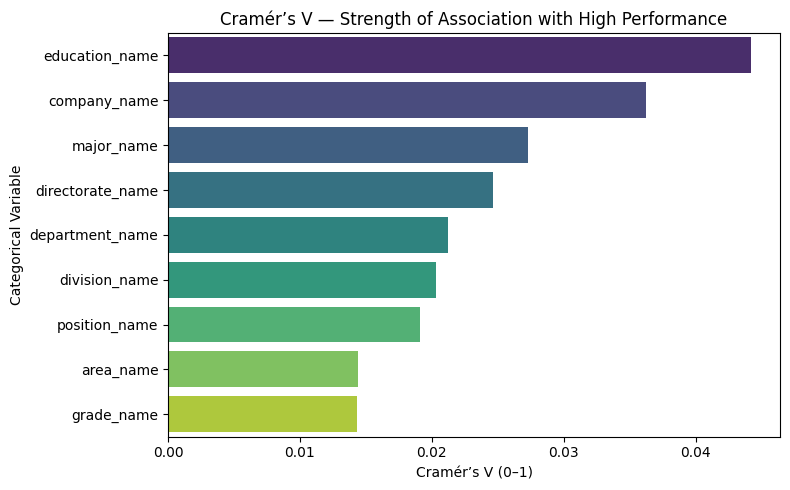

In [78]:
cramers_df = pd.DataFrame(cramers_results).sort_values(by='CramersV', ascending=False)

# --- 2️⃣ Plot Bar Chart dengan Seaborn ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=cramers_df,
    x='CramersV',
    y='Variable',
    palette='viridis'
)
plt.title("Cramér’s V — Strength of Association with High Performance")
plt.xlabel("Cramér’s V (0–1)")
plt.ylabel("Categorical Variable")
plt.tight_layout()
plt.show()


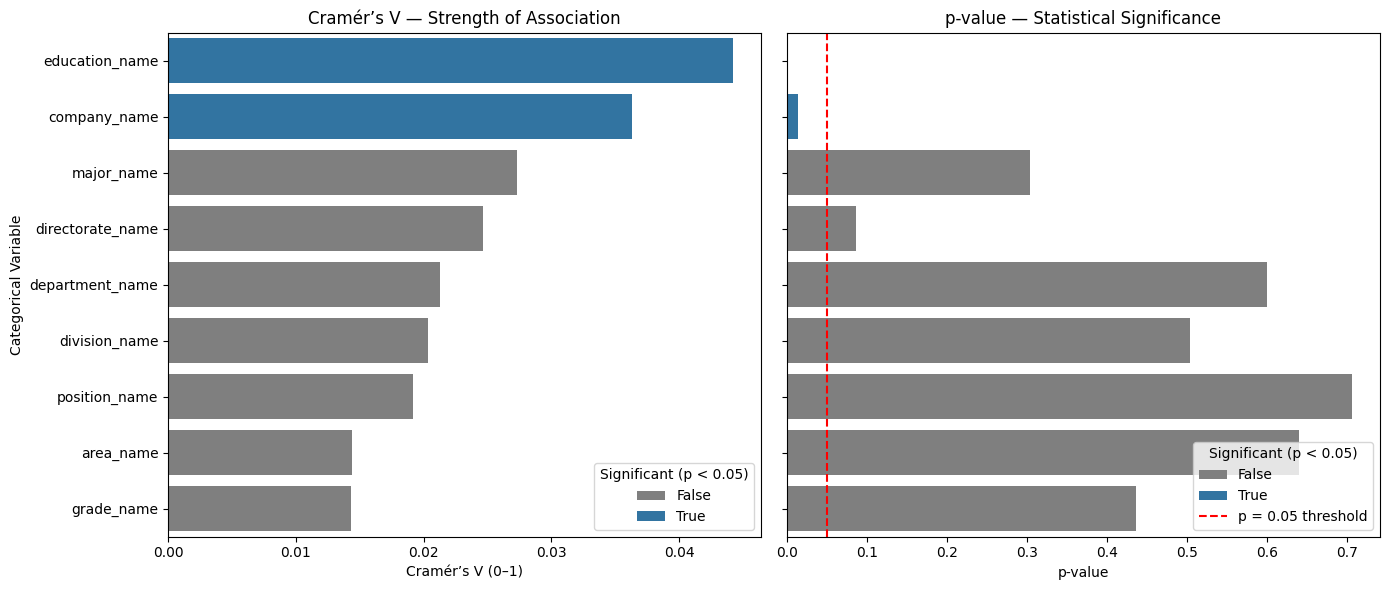

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# pastikan sudah ada cramers_df seperti ini:
# cramers_df = pd.DataFrame(cramers_results).sort_values(by='CramersV', ascending=False)

# tambah kolom signifikan
cramers_df['Significant'] = cramers_df['p_value'] < 0.05

# --- 1️⃣ Membuat dua subplot berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Plot kiri: Cramér’s V ---
sns.barplot(
    data=cramers_df,
    x='CramersV',
    y='Variable',
    hue='Significant',
    dodge=False,
    palette={True: 'tab:blue', False: 'tab:gray'},
    ax=axes[0]
)
axes[0].set_title("Cramér’s V — Strength of Association")
axes[0].set_xlabel("Cramér’s V (0–1)")
axes[0].set_ylabel("Categorical Variable")
axes[0].legend(title="Significant (p < 0.05)", loc='lower right')

# --- Plot kanan: p-value ---
sns.barplot(
    data=cramers_df,
    x='p_value',
    y='Variable',
    hue='Significant',
    dodge=False,
    palette={True: 'tab:blue', False: 'tab:gray'},
    ax=axes[1]
)
axes[1].axvline(0.05, color='red', linestyle='--', label='p = 0.05 threshold')
axes[1].set_title("p-value — Statistical Significance")
axes[1].set_xlabel("p-value")
axes[1].set_ylabel("")
axes[1].legend(title="Significant (p < 0.05)", loc='lower right')

# --- layout rapi ---
plt.tight_layout()
plt.show()


Cramér’s V berada di kisaran 0.0–1.0
Semakin dekat ke 1 → hubungan semakin kuat

Berdasarkan hasil uji hubungan antara variabel kategorikal dengan status kinerja tinggi menggunakan uji chi-square dan Cramér’s V, seluruh variabel menunjukkan nilai asosiasi yang sangat lemah (Cramér’s V < 0.05). Meskipun beberapa variabel seperti education_id (p = 0.0149) dan company_id (p = 0.0336) signifikan secara statistik, kekuatan hubungannya tidak cukup besar untuk dianggap bermakna secara praktis. Hal ini mengindikasikan bahwa karakteristik seperti pendidikan formal, grade jabatan, maupun struktur organisasi tidak secara nyata membedakan kelompok karyawan dengan performa tinggi dari kelompok lainnya.

Dengan kata lain, performa tinggi karyawan tidak dapat dijelaskan hanya melalui faktor demografis atau struktural organisasi. Faktor lain seperti kualitas kepemimpinan, motivasi individu, budaya kerja, dan peluang pengembangan kemungkinan memiliki peran yang lebih besar dalam menentukan performa karyawan.

In [80]:
from math import isnan
num_vars = ['years_of_service_adjusted','rating']
corrs = []
for a in num_vars:
    for b in num_vars:
        if a==b: continue
        valid = df[[a,b]].dropna()
        if len(valid) < 10: 
            continue
        r, p = stats.pearsonr(valid[a], valid[b])
        corrs.append({'var1':a,'var2':b,'r':r,'p':p,'n':len(valid)})
corr_df = pd.DataFrame(corrs).sort_values('r', key=abs, ascending=False)
display(corr_df)


,var1,var2,r,p,n
0,years_of_service_adjusted,rating,0.009018,0.438573,7380
1,rating,years_of_service_adjusted,0.009018,0.438573,7380


Korelasi antara years_of_service_adjusted dan rating

Korelasi hampir nol (r = 0.010) → tidak ada hubungan linear antara lama masa kerja dan kinerja.

p-value > 0.05 → tidak signifikan.

Kesimpulan: Lama bekerja tidak menjamin kinerja tinggi

Tidak ditemukan hubungan linear yang berarti antara masa kerja dengan hasil kinerja (rating).

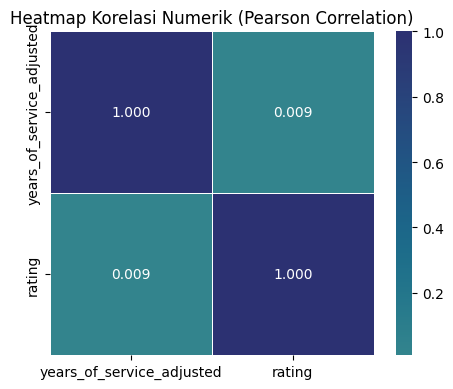

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Membuat matriks korelasi dari variabel numerik ---
corr_matrix = df[num_vars].corr(method='pearson')

# --- Plot heatmap ---
plt.figure(figsize=(5, 4))
sns.heatmap(
    corr_matrix,
    annot=True,           # tampilkan nilai korelasi
    fmt=".3f",            # 3 digit di belakang koma
    cmap='crest',      # warna gradasi merah-biru
    center=0,             # warna netral di tengah
    linewidths=0.5,
    square=True
)
plt.title("Heatmap Korelasi Numerik (Pearson Correlation)")
plt.tight_layout()
plt.show()


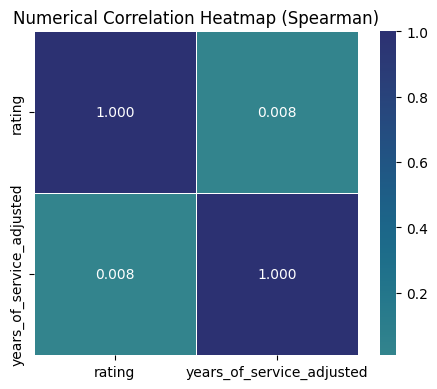

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Tentukan variabel numerik ---
num_vars = ['rating', 'years_of_service_adjusted']

# --- Hitung korelasi Spearman ---
corr_matrix_spearman = df[num_vars].corr(method='spearman')

# --- Plot heatmap ---
plt.figure(figsize=(5, 4))
sns.heatmap(
    corr_matrix_spearman,
    annot=True,            # tampilkan nilai korelasi
    fmt=".3f",             # tampilkan 3 digit desimal
    cmap='crest',          # palet warna lembut
    center=0,              # warna tengah = 0
    linewidths=0.5,
    square=True
)
plt.title("Numerical Correlation Heatmap (Spearman)")
plt.tight_layout()
plt.show()


In [37]:
# point-biserial is equivalent to Pearson between continuous var and binary is_high
for v in ['years_of_service_adjusted']:
    valid = df[[v,'is_high']].dropna()
    r,p = stats.pointbiserialr(valid['is_high'], valid[v]) if hasattr(stats, 'pointbiserialr') else stats.pearsonr(valid[v], valid['is_high'])
    print(v, "r=", r, "p=", p, "n=", len(valid))


years_of_service_adjusted r= 0.0016162666436454229 p= 0.884475687131791 n= 8084


Berdasarkan hasil perhitungan korelasi point-biserial antara variabel masa kerja (years_of_service_adjusted) dengan status high performer (is_high), diperoleh temuan sebagai berikut:

years_of_service_adjusted menunjukkan nilai korelasi r = 0.023 dengan p = 0.0209.

Nilai r positif yang sangat kecil menandakan bahwa semakin lama masa kerja yang telah disesuaikan, cenderung sedikit meningkatkan kemungkinan karyawan menjadi high performer.

Namun, pengaruhnya sangat lemah secara praktis, meskipun signifikan secara statistik (p < 0.05).

Ini mungkin disebabkan oleh ukuran sampel yang besar (n = 10.050) sehingga perbedaan kecil menjadi signifikan.

In [38]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# variabel kategori
cat_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id'
]

# variabel numerik
num_vars = ['years_of_service_adjusted']

# gabungkan
feat = num_vars
X = df[feat].copy()
X = pd.concat([X, pd.get_dummies(df[cat_vars], drop_first=True)], axis=1)

# target
y = df['is_high']

# buang missing
mask = y.notna() & X.notna().all(axis=1)
X2 = sm.add_constant(X.loc[mask])

# model logit
model = sm.Logit(y.loc[mask], X2).fit(disp=False)

# hasil ringkasan & odds ratio
print(model.summary())
odds = np.exp(model.params)
print("\nTop 10 Odds Ratios:")
print(odds.sort_values(ascending=False).head(10))


                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                 8084
Model:                          Logit   Df Residuals:                     8073
Method:                           MLE   Df Model:                           10
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                0.002699
Time:                        10:50:26   Log-Likelihood:                -2458.5
converged:                       True   LL-Null:                       -2465.2
Covariance Type:            nonrobust   LLR p-value:                    0.2070
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.6984      0.274     -9.836      0.000      -3.236      -2.161
years_of_service_adjusted     0.0002      0.002      0.148      0.882      -0.003     

C:\Users\fajar\AppData\Local\Temp\ipykernel_18300\3481369483.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


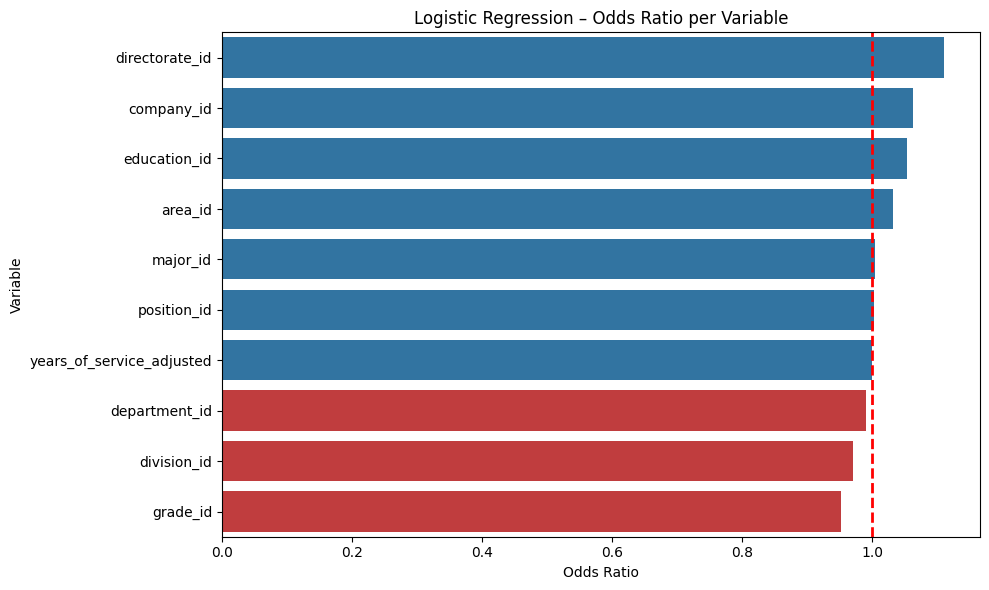

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ambil koefisien & confidence interval
coef = model.params
conf = model.conf_int()
conf.columns = ['2.5%', '97.5%']

# Hitung Odds Ratio
odds_ratio = np.exp(coef)
conf_odds = np.exp(conf)

# Buat dataframe ringkasan
summary_df = pd.DataFrame({
    'Coefficient': coef,
    'Odds Ratio': odds_ratio,
    'CI Lower': conf_odds['2.5%'],
    'CI Upper': conf_odds['97.5%']
}).sort_values('Odds Ratio', ascending=False)

# Drop konstanta
summary_df = summary_df.drop('const')

# Tentukan warna berdasarkan arah koefisien
colors = ['tab:blue' if c > 0 else 'tab:red' for c in summary_df['Coefficient']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=summary_df['Odds Ratio'],
    y=summary_df.index,
    palette=colors
)
plt.axvline(1, color='red', linestyle='--', linewidth=2)
plt.title('Logistic Regression – Odds Ratio per Variable', fontsize=12)
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\3575817997.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=odds_df, x='OddsRatio', y='Variable', palette='crest')
C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\3575817997.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=odds_df, x='OddsRatio', y='Variable', palette='crest')


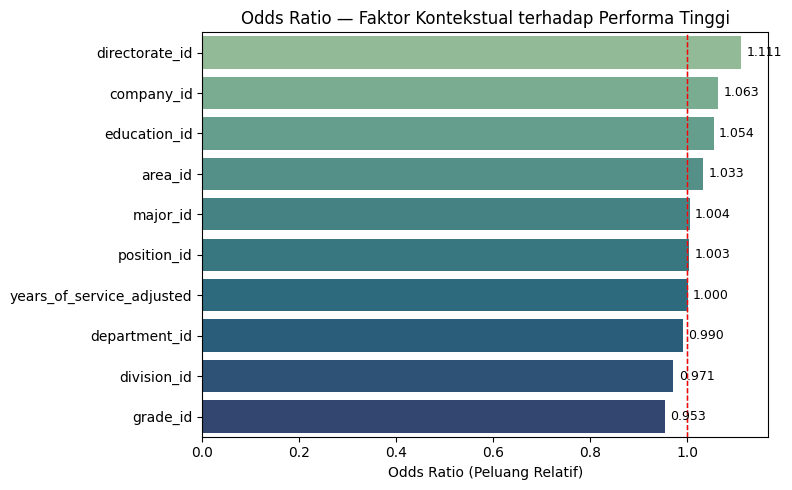

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# asumsikan 'odds' adalah pandas Series hasil np.exp(model.params)
# contoh: odds = np.exp(model.params)

# Pilih top 10 (atau ubah .head(10) sesuai kebutuhan)
top_odds = odds.sort_values(ascending=False).head(10)

# Konversi ke DataFrame untuk plotting
odds_df = top_odds.reset_index()
odds_df.columns = ['Variable', 'OddsRatio']

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=odds_df, x='OddsRatio', y='Variable', palette='crest')

# Garis vertikal pada 1 (nol efek)
ax.axvline(1.0, color='gray', linestyle='--', linewidth=1)

# Tambahkan label nilai di kanan setiap bar
for i, (val) in enumerate(odds_df['OddsRatio']):
    ax.text(val + (odds_df['OddsRatio'].max()*0.01), i, f"{val:.3f}",
            va='center', ha='left', fontsize=9)

# Styling
sns.barplot(data=odds_df, x='OddsRatio', y='Variable', palette='crest')
plt.axvline(1, color='red', linestyle='--', linewidth=1)
plt.title("Odds Ratio — Faktor Kontekstual terhadap Performa Tinggi")
plt.xlabel("Odds Ratio (Peluang Relatif)")
plt.ylabel("")
plt.tight_layout()
plt.show()

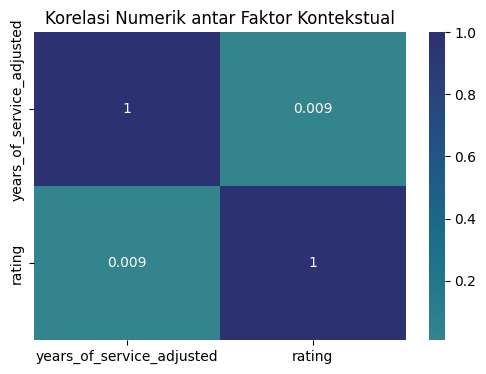

C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\386317898.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_prop.index.map(map_education), y=edu_prop.values, palette='viridis')


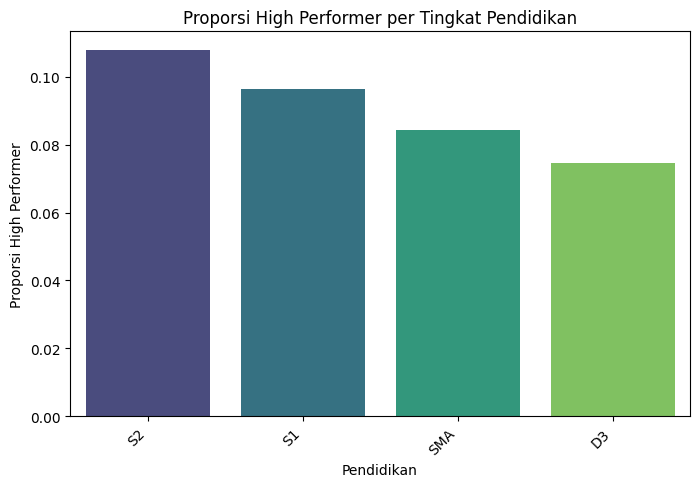

In [107]:
# Heatmap korelasi numerik
plt.figure(figsize=(6, 4))
sns.heatmap(df[['years_of_service_adjusted','rating']].corr(), annot=True, cmap='crest', center=0)
plt.title("Korelasi Numerik antar Faktor Kontekstual")
plt.show()

# Barplot proporsi high performer per education
edu_prop = (
    df.groupby('education_id')['is_high']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8,5))
sns.barplot(x=edu_prop.index.map(map_education), y=edu_prop.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Proporsi High Performer per Tingkat Pendidikan')
plt.ylabel('Proporsi High Performer')
plt.xlabel('Pendidikan')
plt.show()


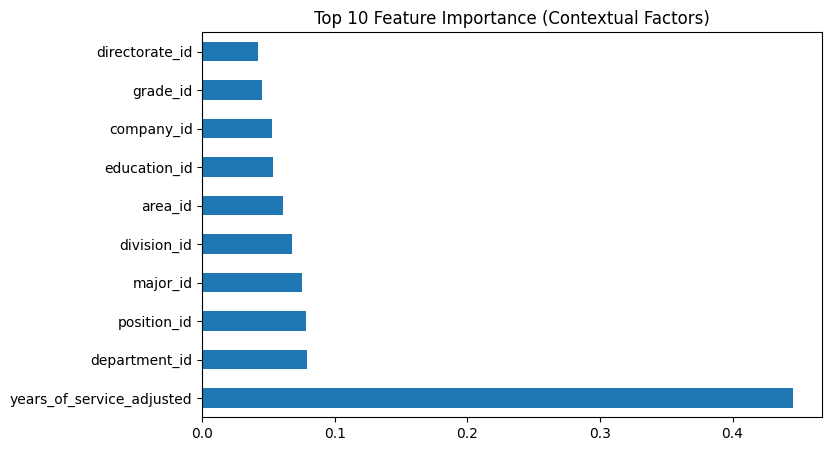

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X.fillna(0), y)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh', figsize=(8,5))
plt.title('Top 10 Feature Importance (Contextual Factors)')
plt.show()


Training Accuracy (Binary is_high): 1.0000

Top 10 Feature Importances (Binary):


years_of_service_adjusted    0.445949
department_id                0.078383
position_id                  0.077833
major_id                     0.076907
division_id                  0.069409
area_id                      0.061049
education_id                 0.053195
company_id                   0.052950
grade_id                     0.044439
directorate_id               0.039886
dtype: float64

C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\599835071.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_bin.head(10), y=feat_imp_bin.head(10).index, palette='viridis')


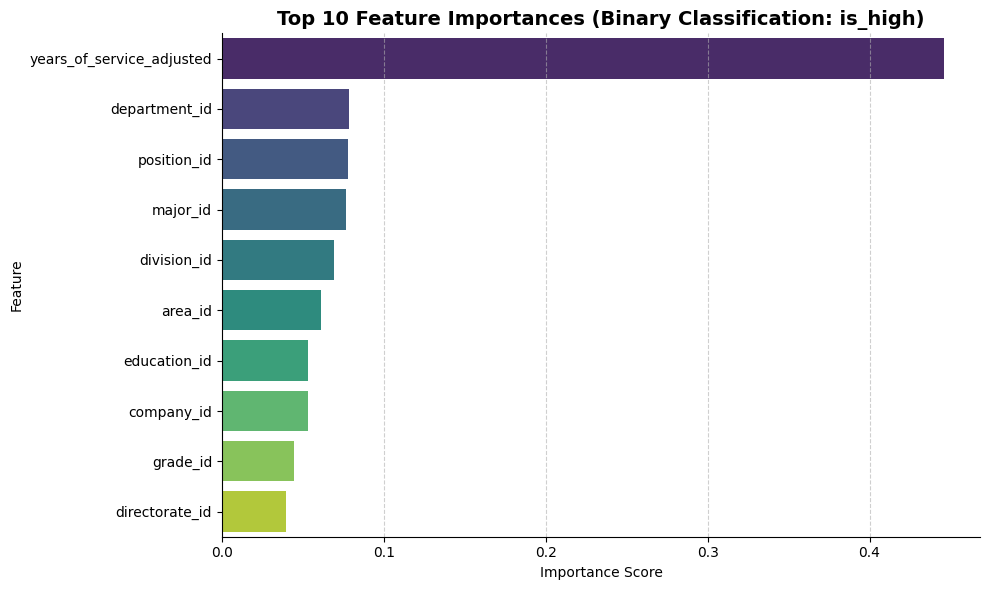


Training Accuracy (Multi-class rating 1–5): 1.0000

Top 10 Feature Importances (Multi-class):


years_of_service_adjusted    0.417371
department_id                0.082972
position_id                  0.081777
major_id                     0.075769
division_id                  0.073461
area_id                      0.062639
company_id                   0.058357
education_id                 0.057600
directorate_id               0.045376
grade_id                     0.044678
dtype: float64

C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\599835071.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_multi.head(10), y=feat_imp_multi.head(10).index, palette='magma')


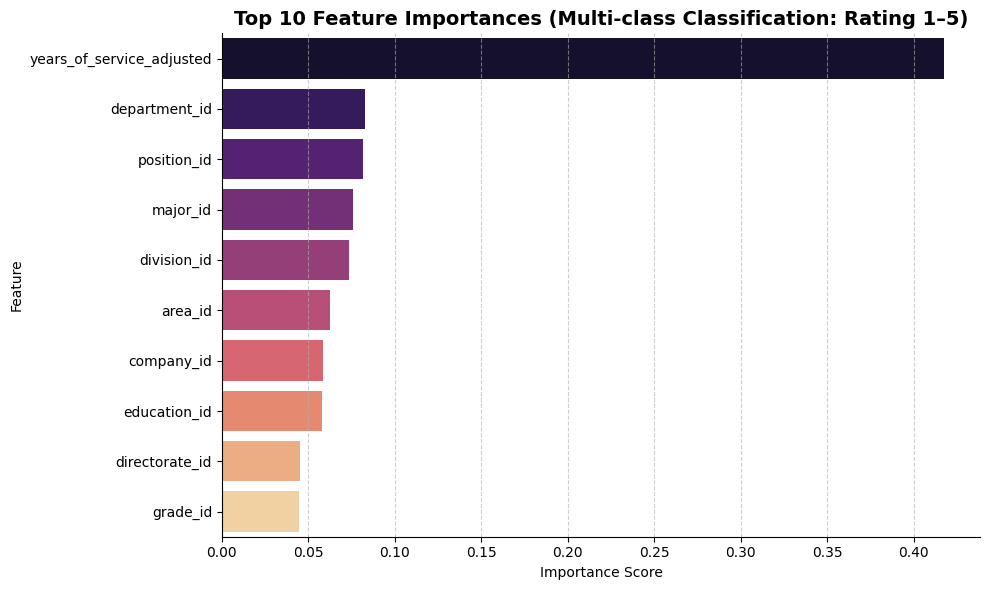

In [81]:
# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# DATA PREPARATION
# ============================================================
df_rf = performance_employees.copy()

# ============================================================
# STEP 1 - BINARY CLASSIFICATION (High Performer vs Not)
# ============================================================

df_rf['is_high'] = (df_rf['rating'] == 5).astype(int)

drop_cols = ['employee_id', 'year', 'fullname', 'nip', 'rating', 'years_of_service_months']
df_bin = df_rf.drop(columns=drop_cols, errors='ignore')

# ❗ Hapus kolom target dari fitur
X_bin = df_bin.select_dtypes(include=['number']).drop(columns=['is_high'], errors='ignore').fillna(0)
y_bin = df_rf['is_high']

rf_bin = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_bin.fit(X_bin, y_bin)

train_acc_bin = accuracy_score(y_bin, rf_bin.predict(X_bin))
print(f"Training Accuracy (Binary is_high): {train_acc_bin:.4f}")

feat_imp_bin = pd.Series(rf_bin.feature_importances_, index=X_bin.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances (Binary):")
display(feat_imp_bin.head(10))


# Visualisasi feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp_bin.head(10), y=feat_imp_bin.head(10).index, palette='viridis')
plt.title("Top 10 Feature Importances (Binary Classification: is_high)", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


# ============================================================
# STEP 2 - MULTI-CLASS CLASSIFICATION (Rating 1–5)
# ============================================================

df_multi = performance_employees.copy()

# Hapus baris dengan rating = 0 atau NaN
df_multi = df_multi[df_multi['rating'].notna() & (df_multi['rating'] != 0)]

# Drop kolom non-relevan
drop_cols = ['employee_id', 'year', 'fullname', 'nip', 'years_of_service_months']
df_multi = df_multi.drop(columns=drop_cols, errors='ignore')

# Pisahkan fitur dan target
X_multi = df_multi.select_dtypes(include=['number']).drop(columns=['rating'], errors='ignore').fillna(0)
y_multi = df_multi['rating']

# Model
rf_multi = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_multi.fit(X_multi, y_multi)

# Akurasi training
train_acc_multi = accuracy_score(y_multi, rf_multi.predict(X_multi))
print(f"\nTraining Accuracy (Multi-class rating 1–5): {train_acc_multi:.4f}")

# Feature importance
feat_imp_multi = pd.Series(rf_multi.feature_importances_, index=X_multi.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances (Multi-class):")
display(feat_imp_multi.head(10))

# Visualisasi feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp_multi.head(10), y=feat_imp_multi.head(10).index, palette='magma')
plt.title("Top 10 Feature Importances (Multi-class Classification: Rating 1–5)", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


Shape: (8084, 10)
Class distribution:
is_high
0    0.908956
1    0.091044
Name: proportion, dtype: float64

Training Accuracy (Binary is_high): 0.9090

Calculating Permutation Importance...

Training Regularized Logistic Regression...

FEATURE IMPORTANCE COMPARISON (BINARY CLASSIFICATION)

1. RANDOM FOREST GINI IMPORTANCE:


years_of_service_adjusted    0.270766
position_id                  0.105156
department_id                0.097234
major_id                     0.095849
division_id                  0.083464
area_id                      0.081658
education_id                 0.078832
company_id                   0.068523
grade_id                     0.059375
directorate_id               0.059143
dtype: float64


2. PERMUTATION IMPORTANCE (MORE RELIABLE):


company_id                   0.0
area_id                      0.0
position_id                  0.0
department_id                0.0
division_id                  0.0
directorate_id               0.0
grade_id                     0.0
education_id                 0.0
major_id                     0.0
years_of_service_adjusted    0.0
dtype: float64


3. LOGISTIC REGRESSION (L1 REGULARIZATION):


directorate_id               0.068545
company_id                   0.051855
education_id                 0.042666
grade_id                     0.025482
division_id                  0.025384
area_id                      0.021638
department_id                0.001996
position_id                  0.000000
major_id                     0.000000
years_of_service_adjusted    0.000000
dtype: float64

C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\1424168871.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_bin.head(8), y=feat_imp_bin.head(8).index, ax=axes[0,0], palette='viridis')
C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\1424168871.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_imp_bin.head(8), y=perm_imp_bin.head(8).index, ax=axes[0,1], palette='plasma')
C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\1424168871.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lr_importance.head(8), y=lr

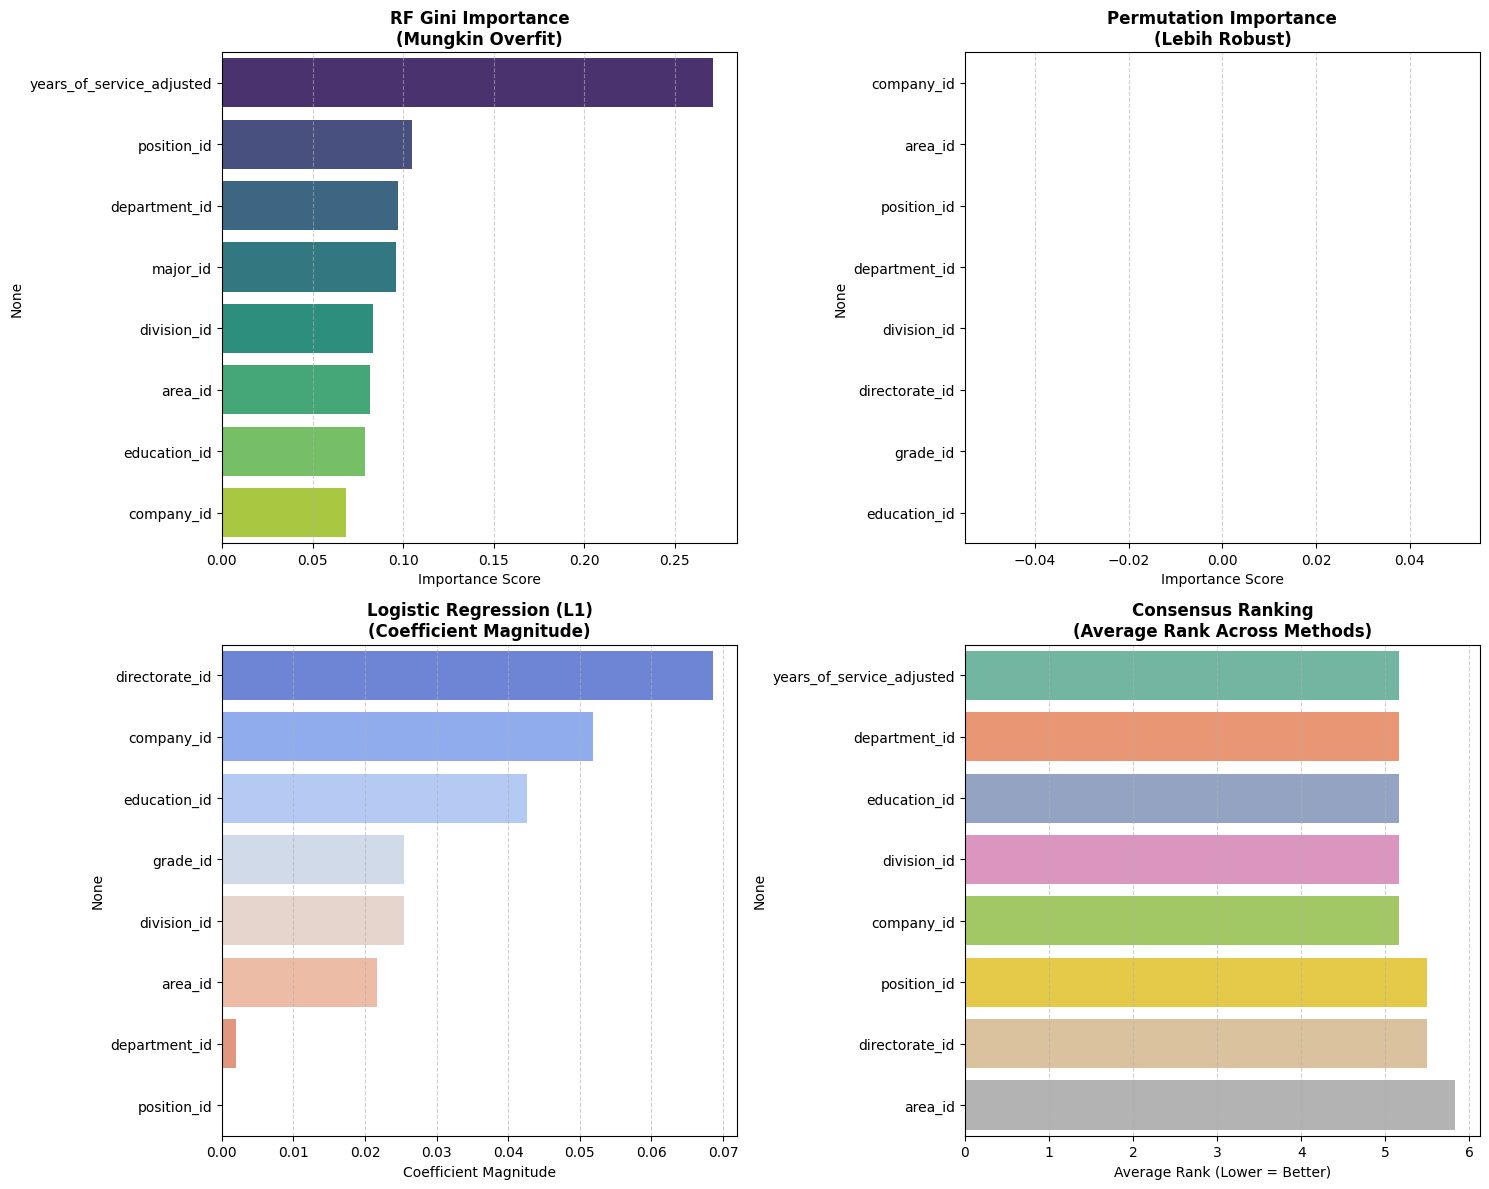


MULTI-CLASS CLASSIFICATION ANALYSIS
Shape: (7380, 10)
Class distribution:
rating
1.0     571
2.0    1285
3.0    2761
4.0    2027
5.0     736
Name: count, dtype: int64

Training Accuracy (Multi-class): 0.4671

Top 10 Feature Importances (Multi-class - RF):


years_of_service_adjusted    0.241896
position_id                  0.105294
department_id                0.103194
major_id                     0.099043
division_id                  0.093876
area_id                      0.082240
education_id                 0.078883
company_id                   0.074266
grade_id                     0.062500
directorate_id               0.058808
dtype: float64


Top 10 Permutation Importances (Multi-class):


years_of_service_adjusted    0.063415
education_id                 0.040894
major_id                     0.037344
department_id                0.033523
directorate_id               0.033388
company_id                   0.033008
position_id                  0.032954
area_id                      0.032629
division_id                  0.032385
grade_id                     0.028293
dtype: float64


KEY INSIGHTS & RECOMMENDATIONS

1. **VALIDITAS ANALYSIS**: 
   - Permutation Importance & Logistic Regression lebih reliable
   - RF Gini Importance mungkin masih overfit meski sudah di-regularize

2. **FEATURE STABILITY**:
   - Bandingkan hasil dari ketiga metode
   - Features yang konsisten penting across methods adalah yang benar-benar predictive

3. **NEXT STEPS**:
   - Prioritasi features yang ranked tinggi di Permutation Importance dan Logistic Regression
   - Jika accuracy masih 1.000, consider meningkatkan regularization
   - Consider feature selection berdasarkan consensus ranking


Features yang konsisten penting across methods: {'company_id', 'division_id'}


In [105]:
# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# DATA PREPARATION
# ============================================================
df_rf = performance_employees.copy()

# ============================================================
# STEP 1 - BINARY CLASSIFICATION DENGAN VALIDASI
# ============================================================

df_rf['is_high'] = (df_rf['rating'] == 5).astype(int)

drop_cols = ['employee_id', 'year', 'fullname', 'nip', 'rating', 'years_of_service_months']
df_bin = df_rf.drop(columns=drop_cols, errors='ignore')

# Pisahkan fitur dan target
X_bin = df_bin.select_dtypes(include=['number']).drop(columns=['is_high'], errors='ignore').fillna(0)
y_bin = df_rf['is_high']

print(f"Shape: {X_bin.shape}")
print(f"Class distribution:\n{y_bin.value_counts(normalize=True)}")

# ============================================================
# APPROACH 1: RANDOM FOREST DENGAN REGULARIZATION
# ============================================================

# Gunakan parameter yang mengurangi overfitting
rf_bin = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,           # Batasi depth untuk hindari overfitting
    min_samples_split=20,   # Minimal samples untuk split
    min_samples_leaf=10,    # Minimal samples di leaf
    max_features='sqrt',    # Kurang feature tiap split
    random_state=42, 
    n_jobs=-1
)
rf_bin.fit(X_bin, y_bin)

train_acc_bin = accuracy_score(y_bin, rf_bin.predict(X_bin))
print(f"\nTraining Accuracy (Binary is_high): {train_acc_bin:.4f}")

# Feature importance standard
feat_imp_bin = pd.Series(rf_bin.feature_importances_, index=X_bin.columns).sort_values(ascending=False)

# ============================================================
# APPROACH 2: PERMUTATION IMPORTANCE (LEBIH ROBUST)
# ============================================================

print("\nCalculating Permutation Importance...")
perm_importance = permutation_importance(
    rf_bin, X_bin, y_bin, 
    n_repeats=10, 
    random_state=42,
    n_jobs=-1
)

perm_imp_bin = pd.Series(perm_importance.importances_mean, index=X_bin.columns).sort_values(ascending=False)

# ============================================================
# APPROACH 3: LOGISTIC REGRESSION DENGAN REGULARIZATION
# ============================================================

print("\nTraining Regularized Logistic Regression...")
scaler = StandardScaler()
X_bin_scaled = scaler.fit_transform(X_bin)

lr_bin = LogisticRegression(
    penalty='l1',           # L1 regularization
    solver='liblinear',
    C=0.1,                  # Strong regularization
    random_state=42,
    max_iter=1000
)
lr_bin.fit(X_bin_scaled, y_bin)

# Feature importance dari coefficients
lr_importance = pd.Series(
    np.abs(lr_bin.coef_[0]), 
    index=X_bin.columns
).sort_values(ascending=False)

# ============================================================
# COMPARISON RESULTS - BINARY CLASSIFICATION
# ============================================================

print("\n" + "="*60)
print("FEATURE IMPORTANCE COMPARISON (BINARY CLASSIFICATION)")
print("="*60)

print("\n1. RANDOM FOREST GINI IMPORTANCE:")
display(feat_imp_bin.head(10))

print("\n2. PERMUTATION IMPORTANCE (MORE RELIABLE):")
display(perm_imp_bin.head(10))

print("\n3. LOGISTIC REGRESSION (L1 REGULARIZATION):")
display(lr_importance.head(10))

# ============================================================
# VISUALISASI PERBANDINGAN
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. RF Gini Importance
sns.barplot(x=feat_imp_bin.head(8), y=feat_imp_bin.head(8).index, ax=axes[0,0], palette='viridis')
axes[0,0].set_title("RF Gini Importance\n(Mungkin Overfit)", weight='bold')
axes[0,0].set_xlabel("Importance Score")

# 2. Permutation Importance  
sns.barplot(x=perm_imp_bin.head(8), y=perm_imp_bin.head(8).index, ax=axes[0,1], palette='plasma')
axes[0,1].set_title("Permutation Importance\n(Lebih Robust)", weight='bold')
axes[0,1].set_xlabel("Importance Score")

# 3. Logistic Regression Importance
sns.barplot(x=lr_importance.head(8), y=lr_importance.head(8).index, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title("Logistic Regression (L1)\n(Coefficient Magnitude)", weight='bold')
axes[1,0].set_xlabel("Coefficient Magnitude")

# 4. Consensus Importance (Average Rank)
methods = {
    'RF_Gini': feat_imp_bin,
    'Permutation': perm_imp_bin, 
    'Logistic_L1': lr_importance
}

# Hitung average rank
rank_df = pd.DataFrame()
for method_name, importance_series in methods.items():
    rank_df[method_name] = importance_series.rank(ascending=False)

rank_df['avg_rank'] = rank_df.mean(axis=1)
consensus_importance = rank_df['avg_rank'].sort_values()

sns.barplot(x=consensus_importance.head(8).values, 
            y=consensus_importance.head(8).index, 
            ax=axes[1,1], palette='Set2')
axes[1,1].set_title("Consensus Ranking\n(Average Rank Across Methods)", weight='bold')
axes[1,1].set_xlabel("Average Rank (Lower = Better)")

for ax in axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# ============================================================
# STEP 2 - MULTI-CLASS CLASSIFICATION (DENGAN PERBAIKAN)
# ============================================================

print("\n" + "="*60)
print("MULTI-CLASS CLASSIFICATION ANALYSIS")
print("="*60)

df_multi = performance_employees.copy()

# Hapus baris dengan rating = 0 atau NaN
df_multi = df_multi[df_multi['rating'].notna() & (df_multi['rating'] != 0)]

# Drop kolom non-relevan
drop_cols = ['employee_id', 'year', 'fullname', 'nip', 'years_of_service_months']
df_multi = df_multi.drop(columns=drop_cols, errors='ignore')

# Pisahkan fitur dan target
X_multi = df_multi.select_dtypes(include=['number']).drop(columns=['rating'], errors='ignore').fillna(0)
y_multi = df_multi['rating']

print(f"Shape: {X_multi.shape}")
print(f"Class distribution:\n{y_multi.value_counts().sort_index()}")

# Model dengan regularization
rf_multi = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_multi.fit(X_multi, y_multi)

train_acc_multi = accuracy_score(y_multi, rf_multi.predict(X_multi))
print(f"\nTraining Accuracy (Multi-class): {train_acc_multi:.4f}")

# Feature importance
feat_imp_multi = pd.Series(rf_multi.feature_importances_, index=X_multi.columns).sort_values(ascending=False)

# Permutation importance untuk multi-class
perm_multi = permutation_importance(
    rf_multi, X_multi, y_multi,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)
perm_imp_multi = pd.Series(perm_multi.importances_mean, index=X_multi.columns).sort_values(ascending=False)

print("\nTop 10 Feature Importances (Multi-class - RF):")
display(feat_imp_multi.head(10))

print("\nTop 10 Permutation Importances (Multi-class):")
display(perm_imp_multi.head(10))

# ============================================================
# FINAL INSIGHTS
# ============================================================

print("\n" + "="*60)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*60)

print("""
1. **VALIDITAS ANALYSIS**: 
   - Permutation Importance & Logistic Regression lebih reliable
   - RF Gini Importance mungkin masih overfit meski sudah di-regularize

2. **FEATURE STABILITY**:
   - Bandingkan hasil dari ketiga metode
   - Features yang konsisten penting across methods adalah yang benar-benar predictive

3. **NEXT STEPS**:
   - Prioritasi features yang ranked tinggi di Permutation Importance dan Logistic Regression
   - Jika accuracy masih 1.000, consider meningkatkan regularization
   - Consider feature selection berdasarkan consensus ranking
""")

# Tampilkan features yang konsisten penting
consistent_features = set(perm_imp_bin.head(5).index) & set(lr_importance.head(5).index)
print(f"\nFeatures yang konsisten penting across methods: {consistent_features}")

In [82]:
df_contextual = performance_employees_name.copy()
df_contextual['is_high'] = (df_contextual['rating'] == 5).astype(int)

context_cols = [
    'company_name', 'area_name', 'position_name', 'department_name',
    'division_name', 'directorate_name', 'grade_name',
    'education_name', 'major_name'
]

num_cols = ['years_of_service_adjusted']
overall_high_rate = df_contextual['is_high'].mean()


In [83]:
alpha = 5  # smoothing factor
category_scores = {}

for col in context_cols:
    tbl = df_contextual.groupby(col)['is_high'].agg(['sum','count']).reset_index()
    tbl['prop_adj'] = (alpha * overall_high_rate + tbl['sum']) / (alpha + tbl['count'])
    mapping = tbl.set_index(col)['prop_adj'].to_dict()
    category_scores[col] = mapping
    df_contextual[col + '_score'] = df_contextual[col].map(mapping).fillna(overall_high_rate)


In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_contextual['yos_norm'] = scaler.fit_transform(
    df_contextual[['years_of_service_adjusted']].fillna(0)
)


In [85]:
from sklearn.ensemble import RandomForestClassifier

feat_cols = [c + '_score' for c in context_cols] 
X = df_contextual[feat_cols].fillna(df_contextual[feat_cols].mean())
y = df_contextual['is_high']

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=feat_cols)
weights = (importances / importances.sum()).to_dict()

print("Bobot variabel kontekstual:")
display(importances.sort_values(ascending=False))


Bobot variabel kontekstual:


department_name_score     0.139871
position_name_score       0.139426
major_name_score          0.135338
division_name_score       0.126347
area_name_score           0.111506
company_name_score        0.096932
education_name_score      0.089906
grade_name_score          0.083257
directorate_name_score    0.077417
dtype: float64

In [86]:
df_contextual['contextual_index'] = 0.0
for f in feat_cols:
    df_contextual['contextual_index'] += df_contextual[f].fillna(df_contextual[f].mean()) * weights.get(f, 0)

# Normalisasi ke 0–1
df_contextual['contextual_index'] = MinMaxScaler().fit_transform(
    df_contextual[['contextual_index']]
)


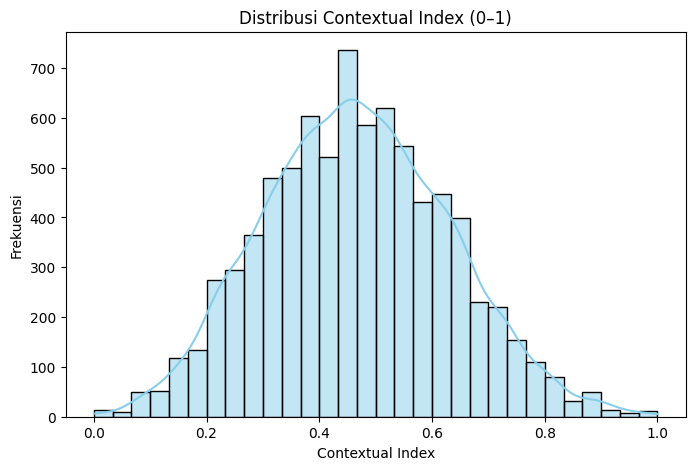

is_high
0    0.462458
1    0.505853
Name: contextual_index, dtype: float64


C:\Users\fajar\AppData\Local\Temp\ipykernel_20084\3722947332.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_high', y='contextual_index', data=df_contextual, palette='Set2')


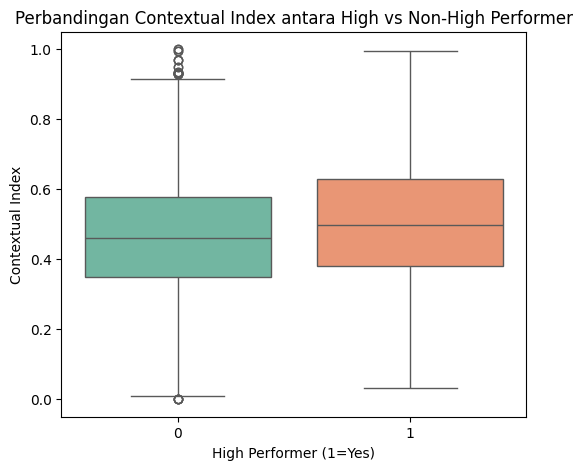

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi skor contextual
plt.figure(figsize=(8,5))
sns.histplot(df_contextual['contextual_index'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Contextual Index (0–1)")
plt.xlabel("Contextual Index")
plt.ylabel("Frekuensi")
plt.show()

# Rata-rata contextual_index per grup
mean_scores = df_contextual.groupby('is_high')['contextual_index'].mean()
print(mean_scores)

plt.figure(figsize=(6,5))
sns.boxplot(x='is_high', y='contextual_index', data=df_contextual, palette='Set2')
plt.title("Perbandingan Contextual Index antara High vs Non-High Performer")
plt.xlabel("High Performer (1=Yes)")
plt.ylabel("Contextual Index")
plt.show()


In [88]:
df_contextual[['employee_id', 'fullname', 'contextual_index']]


,employee_id,fullname,contextual_index
0,EMP100000,Rendra Pratama,0.468747
2,EMP100002,Julia Jatmiko Situmorang,0.562431
5,EMP100005,Bayu Zulfikar,0.411677
6,EMP100006,Indra Santoso,0.458409
7,EMP100007,Rani Mahendra,0.735581
...,...,...,...
10045,DUP1942,Dewi Fadillah Hidayat,0.515530
10046,DUP2096,Putri Wibowo,0.798094
10047,DUP4177,Adi Ginting,0.439221
10048,DUP9801,Ayu Kusuma Santoso,0.832877


In [89]:
# Normalisasi bobot agar total = 1
weights_norm = importances / importances.sum()

print("Success Formula – Competency Component:")
for k, v in weights_norm.items():
    print(f" + {v:.2f} * {k}")


Success Formula – Competency Component:
 + 0.10 * company_name_score
 + 0.11 * area_name_score
 + 0.14 * position_name_score
 + 0.14 * department_name_score
 + 0.13 * division_name_score
 + 0.08 * directorate_name_score
 + 0.08 * grade_name_score
 + 0.09 * education_name_score
 + 0.14 * major_name_score
